# Exoplanet Anaysis Scatterplots

In [1]:
# importing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
dataset = pd.read_csv('filtered_exoplanet_dataset_removed_outliers.csv')

In [3]:
# Convert parsecs to light years
dataset['distance_parsec'] = dataset['distance_parsec'] * 3.262

In [4]:
# display kepler 452b
dataset[dataset['planet_name'] == 'Kepler-452 b']

,planet_name,host_star_name,orbital_period_day,orbit_semi_major_axis_au,planet_rad_earth_rad,planet_rad_jup_rad,planet_mass_earth_mass,planet_mass_jup_mass,Eccentricity,planet_equil_temp_k,spectral_type,stellar_effective_temp_k,stellar_rad_solar_rad,stellar_mass_solar_mass,distance_parsec,stellar_surf_grav,declination_deg,discovery_method
3999,Kepler-452 b,Kepler-452,384.844831,1.009733,1.3722,0.138,NaN,NaN,0.0,235.0,G2,5687.166667,0.998333,0.97,1799.733474,4.446,44.277586,Transit


### Final Graphs

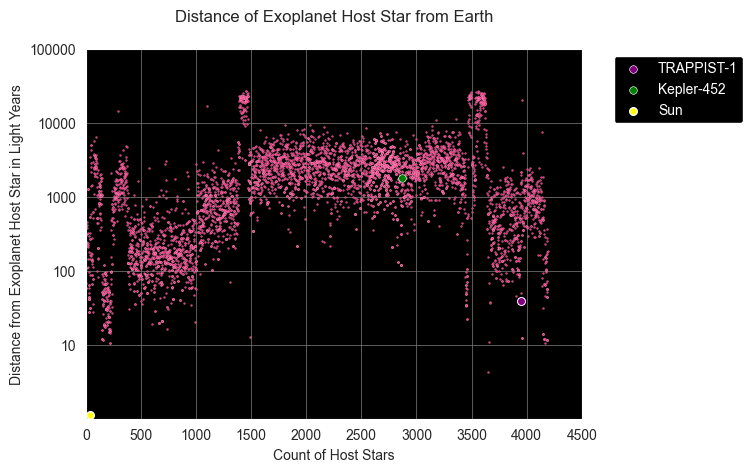

In [5]:
# Distance of Exoplanet Host Star from Earth (For all Host Stars)

# setting color and style of scatterplot
sns.set_style('darkgrid', {'axes.facecolor': 'black'})

# creating scatterplot for Exoplanet distance from Earth
sns.scatterplot(data=dataset, x='host_star_name', y='distance_parsec', color='#f2297d', s=2)
plt.xlabel('Count of Host Stars')
plt.ylabel('Distance from Exoplanet Host Star in Light Years')
plt.title('Distance of Exoplanet Host Star from Earth', pad=20)

# Setting logarithmic scale for y-axis
plt.yscale('log')

# Customize tick label formatting
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Setting major ticks for the x-axis
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500], ['0', '500', '1000', '1500', '2000', '2500', '3000', '3500', '4000', '4500'])
# Setting major ticks for the y-axis
plt.yticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

# Setting x-axis limits to ensure tick marks are spread evenly
plt.xlim(0, 4500)
# Setting y-axis limits to ensure tick marks are spread evenly
plt.ylim(1, 100000)

# manually setting the distance_parsec for Trappist-1
trappist_distance_parsec = 39.46 # in light years
dataset.loc[dataset['host_star_name'] == 'TRAPPIST-1', 'distance_parsec'] = trappist_distance_parsec

# Highlight specific point for Trappist-1 star and add it to scatter plot by layering an additional scatter plot on top
highlighted_trappist_star = dataset[dataset['host_star_name'] == 'TRAPPIST-1']
sns.scatterplot(data=highlighted_trappist_star, x='host_star_name', y='distance_parsec', color='purple', s=30, label='TRAPPIST-1')

# Highlight specific point for Kepler 452 star and add it to scatter plot by layering an additional scatter plot on top
highlighted_kepler452 = dataset[dataset['host_star_name'] == 'Kepler-452']
sns.scatterplot(data=highlighted_kepler452, x='host_star_name', y='distance_parsec', color='green', s=30, label='Kepler-452')

# Highlight specific point for the sun
# Setting an arbitrary x and y postion for the sun that way it can be properly visualized
plt.scatter(40, 1.14, color='yellow', s=30, edgecolor='white', label='Sun')

# Changing the grid color to be more visiable on black background
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust the legend
legend = plt.legend(facecolor='black', edgecolor='white', framealpha=1, fontsize=10, bbox_to_anchor=(1.05, 1), loc = 'upper left')
for text in legend.get_texts():
    text.set_color('white')


plt.show()

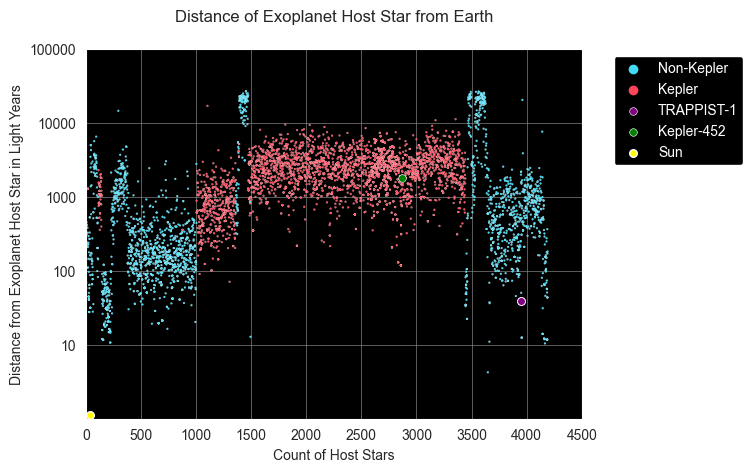

In [6]:
# Distance of Exoplanet Host Star from Earth (For all Host Stars color coded based on kepler or non-kepler)

# Function to determine if a planet is Kepler or not
def is_kepler(planet_name):
    return 'Kepler' if 'Kepler' in planet_name or 'K2' in planet_name or 'EPIC' in planet_name or 'KOI' in planet_name else 'Non-Kepler'

# Create a new column 'Kepler Planet' based on the 'planet_name' column
dataset['Kepler Planet'] = dataset['planet_name'].apply(is_kepler)

# Define colors for Kepler and non-Kepler planets
colors = {'Kepler': '#FD4659', 'Non-Kepler': '#42daf5'}

# setting color and style of scatterplot
sns.set_style('darkgrid', {'axes.facecolor': 'black'})

# creating scatterplot for Exoplanet distance from Earth
sns.scatterplot(data=dataset, x='host_star_name', y='distance_parsec', hue='Kepler Planet', palette=colors, s=2)
plt.xlabel('Count of Host Stars')
plt.ylabel('Distance from Exoplanet Host Star in Light Years')
plt.title('Distance of Exoplanet Host Star from Earth', pad=20)

# Setting logarithmic scale for y-axis
plt.yscale('log')

# Customize tick label formatting
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Setting major ticks for the x-axis
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500], ['0', '500', '1000', '1500', '2000', '2500', '3000', '3500', '4000', '4500'])
# Setting major ticks for the y-axis
plt.yticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

# Setting x-axis limits to ensure tick marks are spread evenly
plt.xlim(0, 4500)
# Setting y-axis limits to ensure tick marks are spread evenly
plt.ylim(1, 100000)

# manually setting the distance_parsec for Trappist-1
trappist_distance_light_year = 39.46 # in light years
dataset.loc[dataset['host_star_name'] == 'TRAPPIST-1', 'distance_parsec'] = trappist_distance_light_year

# Highlight specific point for Trappist-1 star and add it to scatter plot by layering an additional scatter plot on top
highlighted_trappist_star = dataset[dataset['host_star_name'] == 'TRAPPIST-1']
sns.scatterplot(data=highlighted_trappist_star, x='host_star_name', y='distance_parsec', color='purple', s=30, edgecolor='white', label='TRAPPIST-1')

# Highlight specific point for Kepler 452 star and add it to scatter plot by layering an additional scatter plot on top
highlighted_kepler452 = dataset[dataset['host_star_name'] == 'Kepler-452']
sns.scatterplot(data=highlighted_kepler452, x='host_star_name', y='distance_parsec', color='green', s=30, edgecolor='white', label='Kepler-452')

# Highlight specific point for the sun
# Setting an arbitrary x and y postion for the sun that way it can be properly visualized
plt.scatter(40, 1.14, color='yellow', s=30, edgecolor='white', label='Sun')

# Changing the grid color to be more visiable on black background
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust the legend
legend = plt.legend(facecolor='black', edgecolor='white', framealpha=1, fontsize=10, bbox_to_anchor=(1.05, 1), loc = 'upper left')
for text in legend.get_texts():
    text.set_color('white')


plt.show()

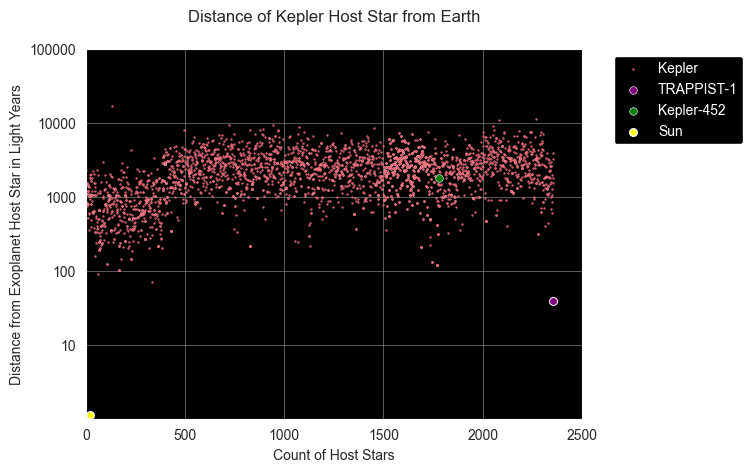

In [9]:
# Distance of Exoplanet Host Star from Earth (For all Kepler Host Stars)

# filter dataset for kepler only host stars
kepler_host_stars = dataset[
    dataset['host_star_name'].str.startswith('Kepler-') |
    dataset['host_star_name'].str.startswith('K2-') |
    dataset['host_star_name'].str.startswith('EPIC') |
    dataset['host_star_name'].str.startswith('KOI-')
]

# Define colors for Kepler and non-Kepler planets
colors = {'Kepler': '#FD4659', 'Non-Kepler': '#42daf5'}

# creating scatterplot for Exoplanet distance from Earth
sns.scatterplot(data=kepler_host_stars, x='host_star_name', y='distance_parsec', color='#FD4659', s=2, label='Kepler')
plt.xlabel('Count of Host Stars')
plt.ylabel('Distance from Exoplanet Host Star in Light Years')
plt.title('Distance of Kepler Host Star from Earth', pad=20)

# Setting logarithmic scale for y-axis
plt.yscale('log')

# Customize tick label formatting
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Setting major ticks for the x-axis
plt.xticks([0, 500, 1000, 1500, 2000, 2500], ['0', '500', '1000', '1500', '2000', '2500'])
# Setting major ticks for the y-axis
plt.yticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

# Setting x-axis limits to ensure tick marks are spread evenly
plt.xlim(0, 2500)
# Setting y-axis limits to ensure tick marks are spread evenly
plt.ylim(1, 100000)

# manually setting the distance_parsec for Trappist-1
trappist_distance_light_year = 39.46 # in light years
dataset.loc[dataset['host_star_name'] == 'TRAPPIST-1', 'distance_parsec'] = trappist_distance_light_year

# Highlight specific point for Trappist-1 star and add it to scatter plot by layering an additional scatter plot on top
highlighted_trappist_star = dataset[dataset['host_star_name'] == 'TRAPPIST-1']
sns.scatterplot(data=highlighted_trappist_star, x='host_star_name', y='distance_parsec', color='purple', s=30, edgecolor='white', label='TRAPPIST-1')

# Highlight specific point for Kepler 452 star and add it to scatter plot by layering an additional scatter plot on top
highlighted_kepler452 = dataset[dataset['host_star_name'] == 'Kepler-452']
sns.scatterplot(data=highlighted_kepler452, x='host_star_name', y='distance_parsec', color='green', s=30, edgecolor='white', label='Kepler-452')

# Highlight specific point for the sun
# Setting an arbitrary x and y postion for the sun that way it can be properly visualized
plt.scatter(20, 1.14, color='yellow', s=30, edgecolor='white', label='Sun')

# Changing the grid color to be more visiable on black background
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust the legend
legend = plt.legend(facecolor='black', edgecolor='white', framealpha=1, fontsize=10, bbox_to_anchor=(1.05, 1), loc = 'upper left')
for text in legend.get_texts():
    text.set_color('white')


plt.show()

In [27]:
# Distance of Exoplanet Host Star from Earth (For all non-Kepler Host Stars)

# filter dataset for kepler only host stars
non_kepler_host_stars1 = dataset[~dataset['planet_name'].str.startswith('Kepler-')]
non_kepler_host_stars2 = non_kepler_host_stars1[~dataset['planet_name'].str.startswith('K2-')]
non_kepler_host_stars3 = non_kepler_host_stars2[~dataset['planet_name'].str.startswith('KOI-')]
non_kepler_host_stars = non_kepler_host_stars3[~dataset['planet_name'].str.startswith('EPIC')]
non_kepler_host_stars

,planet_name,host_star_name,orbital_period_day,orbit_semi_major_axis_au,planet_rad_earth_rad,planet_rad_jup_rad,planet_mass_earth_mass,planet_mass_jup_mass,Eccentricity,planet_equil_temp_k,spectral_type,stellar_effective_temp_k,stellar_rad_solar_rad,stellar_mass_solar_mass,distance_parsec,stellar_surf_grav,declination_deg,discovery_method,Kepler Planet
0,11 Com b,11 Com,324.620000,1.226000,NaN,NaN,5505.066163,17.321333,0.234500,NaN,G8 III,4808.000000,16.380000,2.463333,303.968165,2.3800,17.793252,Radial Velocity,Non-Kepler
1,11 UMi b,11 UMi,516.219985,1.526667,NaN,NaN,3818.094733,12.013333,0.080000,NaN,K4 III,4276.500000,26.935000,2.093333,408.797102,1.7650,71.823943,Radial Velocity,Non-Kepler
2,14 And b,14 And,186.300000,0.761667,NaN,NaN,1224.550433,3.853000,0.000000,NaN,K0 III,4850.500000,11.275000,1.726667,246.082670,2.5900,39.235837,Radial Velocity,Non-Kepler
3,14 Her b,14 Her,1766.378417,2.814750,NaN,NaN,1642.383591,5.167625,0.362925,NaN,K0 V,5296.985000,0.976667,0.927143,58.495163,4.4200,43.816362,Radial Velocity,Non-Kepler
4,16 Cyg B b,16 Cyg B,799.375000,1.662833,NaN,NaN,533.514528,1.678667,0.676033,NaN,G2.5 V,5728.594000,1.140000,1.016000,68.957701,4.3440,50.516824,Radial Velocity,Non-Kepler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,ups And b,ups And,4.616229,0.058895,NaN,NaN,219.960419,0.692086,0.030200,NaN,F8 V,6137.820000,1.615000,1.250000,43.728415,4.1625,41.403815,Radial Velocity,Non-Kepler
5626,ups And c,ups And,240.728533,0.827712,NaN,NaN,1275.328758,4.012667,0.238933,NaN,F8 V,6117.093333,1.615000,1.262500,43.728415,4.1500,41.403815,Radial Velocity,Non-Kepler
5627,ups And d,ups And,1285.346167,2.528382,NaN,NaN,1616.242590,5.085333,0.281117,NaN,F8 V,6117.093333,1.615000,1.262500,43.728415,4.1500,41.403815,Radial Velocity,Non-Kepler
5628,ups Leo b,ups Leo,385.200000,1.180000,NaN,NaN,162.092490,0.510000,0.320000,NaN,G9 III,4836.000000,11.220000,1.480000,171.572393,2.4600,-0.823564,Radial Velocity,Non-Kepler


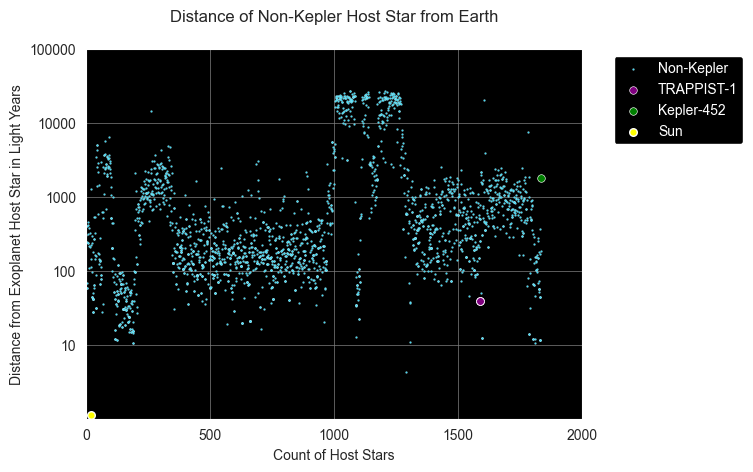

In [30]:
# Define colors for Kepler and non-Kepler planets
colors = {'Kepler': '#FD4659', 'Non-Kepler': '#42daf5'}

# creating scatterplot for Exoplanet distance from Earth
sns.scatterplot(data=non_kepler_host_stars, x='host_star_name', y='distance_parsec', color='#42daf5', s=2, label='Non-Kepler')
plt.xlabel('Count of Host Stars')
plt.ylabel('Distance from Exoplanet Host Star in Light Years')
plt.title('Distance of Non-Kepler Host Star from Earth', pad=20)

# Setting logarithmic scale for y-axis
plt.yscale('log')

# Customize tick label formatting
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Setting major ticks for the x-axis
plt.xticks([0, 500, 1000, 1500, 2000], ['0', '500', '1000', '1500', '2000'])
# Setting major ticks for the y-axis
plt.yticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'])

# Setting x-axis limits to ensure tick marks are spread evenly
plt.xlim(0, 2000)
# Setting y-axis limits to ensure tick marks are spread evenly
plt.ylim(1, 100000)

# manually setting the distance_parsec for Trappist-1
trappist_distance_light_year = 39.46 # in light years
dataset.loc[dataset['host_star_name'] == 'TRAPPIST-1', 'distance_parsec'] = trappist_distance_light_year

# Highlight specific point for Trappist-1 star and add it to scatter plot by layering an additional scatter plot on top
highlighted_trappist_star = dataset[dataset['host_star_name'] == 'TRAPPIST-1']
sns.scatterplot(data=highlighted_trappist_star, x='host_star_name', y='distance_parsec', color='purple', s=30, edgecolor='white', label='TRAPPIST-1')

# Highlight specific point for Kepler 452 star and add it to scatter plot by layering an additional scatter plot on top
highlighted_kepler452 = dataset[dataset['host_star_name'] == 'Kepler-452']
sns.scatterplot(data=highlighted_kepler452, x='host_star_name', y='distance_parsec', color='green', s=30, edgecolor='white', label='Kepler-452')

# Highlight specific point for the sun
# Setting an arbitrary x and y postion for the sun that way it can be properly visualized
plt.scatter(20, 1.14, color='yellow', s=30, edgecolor='white', label='Sun')

# Changing the grid color to be more visiable on black background
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust the legend
legend = plt.legend(facecolor='black', edgecolor='white', framealpha=1, fontsize=10, bbox_to_anchor=(1.05, 1), loc = 'upper left')
for text in legend.get_texts():
    text.set_color('white')


plt.show()